In [184]:
# Proyecto de Hector Vazquez Terreros
'''#Usamos esta paqueteria, pero para optimizar el codigo, solo podemos importar las sigientes carpetas'''
import sklearn

In [185]:
'''Realizamos las importaciones necesarias'''
import matplotlib.pyplot as plt #biblioteca utilizada para crear gráficos y visualizaciones
import pandas as pd #Importamos pandas para el analisis y manipulacion de los datos en el documento
from sklearn.model_selection import train_test_split #Ipprtamos para dividir un conjunto de datos en dos partes:(entrenar y probar)
from sklearn.preprocessing import StandardScaler # Para estandarizar las características de los datos
from sklearn.svm import SVC #Mdelo de clasificación basado en máquinas de soporte vectorial
from sklearn.linear_model import LogisticRegression #Modelo de regresión logística
from sklearn.neighbors import KNeighborsClassifier # Clasifica un punto según las clases de sus 'K' puntos más cercanos en el espacio de características
from sklearn.tree import DecisionTreeClassifier # Modelo de árbol de decisión utilizado para tareas de clasificación
from sklearn.ensemble import RandomForestClassifier #algoritmo de aprendizaje supervisado
from sklearn.metrics import confusion_matrix, classification_report #para generar la matriz de confusión, informe de clasificación


In [120]:
'''Definimos la clase Modelos_Clasificadores'''
class Modelos_Clasificadores:

    def __init__(self): #Inicializamos los atriutos de la clase
        '''Esto es un clasificador xd'''
        # Definir los modelos que se van a usar

        self.modelos_disponibles = {
            "Logística": LogisticRegression(),
            "k-Nearest Neighbors": KNeighborsClassifier(),
            "Máquina de soporte vectorial": SVC(),
            "Árbol de decicion": DecisionTreeClassifier(),
            "Bosque Aleatorio": RandomForestClassifier()
        }
        self.resultados_modelos = {} #Definimos un diccionario vacio para almacenar los resultados de las evaluaciones

    '''Esta funcion entrena todos los modelos de clasificacion definidos en el diccionario "Modelos disponibles" '''
    def ajustar_modelos(self, datos_entrenamiento, etiquetas_entrenamiento):

        # Este es un bucle for, recorre el diccionario "self.modelos_disponibles" , donde nombre del modelo es la clave y modelo es lla instancia de cada modelo de clasificación)
        for nombre, modelo in self.modelos_disponibles.items():
            modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

            '''Después de que cada modelo se haya entrenado, se imprime un mensaje indicando que el modelo con el nombre correspondiente ha sido  entrenado '''
            print(" El modelo " + nombre + " a sido entrenado.")

    '''Con esta funcion evaluamos  el rendimiento de los modelos de clasificación que ya han sido entrenados utilizando el conjunto de datos de prueba'''
    def evaluar_modelos(self, datos_prueba, etiquetas_prueba): # Esto permite acceder a los atributos y métodos de la clase
        '''Evaluamos los metodos entrenados, el bucle For recorre todos los modelos de clasificación almacenados en el diccionario "modelos_disponibles" '''
        for nombre, modelo in self.modelos_disponibles.items():
            predicciones = modelo.predict(datos_prueba) #Toma como entrada los datos de prueba y devuelve las predicciones del modelo sobre los datos
            print("\nEvaluación del modelo: " + nombre) #se imprime un mensaje con el nombre del modelo para indicar que se está evaluando ese modelo en particular

            '''La matriz de confusion nos sirve para evaluar el rendimiento de un modelo de clasificación'''
            print("\nMatriz de confusión:")
            print(confusion_matrix(etiquetas_prueba, predicciones))

            '''La función classification_report proporciona un resumen completo de las métricas clave, en este caso; precisión, recall, F1-score, y soporte, para evaluar el rendimiento de un modelo de clasificación, tanto para cada clase individual como para un promedio general'''

            print("\nReporte de clasificación:")
            print(classification_report(etiquetas_prueba, predicciones))

            # Guardar los resultados
            self.resultados_modelos[nombre] = classification_report(etiquetas_prueba, predicciones, output_dict=True)


In [132]:
# Importamos el archivo adjunto a la práctica para analizarlo
Rt_ach = pd.read_csv("/content/cancer - cancer (1).csv")
print(Rt_ach)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
494    914102         B        13.16         20.54           84.06      538.7   
495    914333         B        14.87         20.21           96.12      680.9   
496    914366         B        12.65         18.17           82.69      485.6   
497    914580         B        12.47         17.31           80.45      480.1   
498    914769         M        18.49         17.52          121.30     1068.0   

     smoothness_mean  compa


Entrenando modelos espere un poco...
 El modelo Logística a sido entrenado.
 El modelo k-Nearest Neighbors a sido entrenado.
 El modelo Máquina de soporte vectorial a sido entrenado.
 El modelo Árbol de decicion a sido entrenado.
 El modelo Bosque Aleatorio a sido entrenado.

Evaluando modelos...

Evaluación del modelo: Logística

Matriz de confusión:
[[89  0]
 [ 1 60]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        61

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Evaluación del modelo: k-Nearest Neighbors

Matriz de confusión:
[[89  0]
 [ 2 59]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.97      0.98        

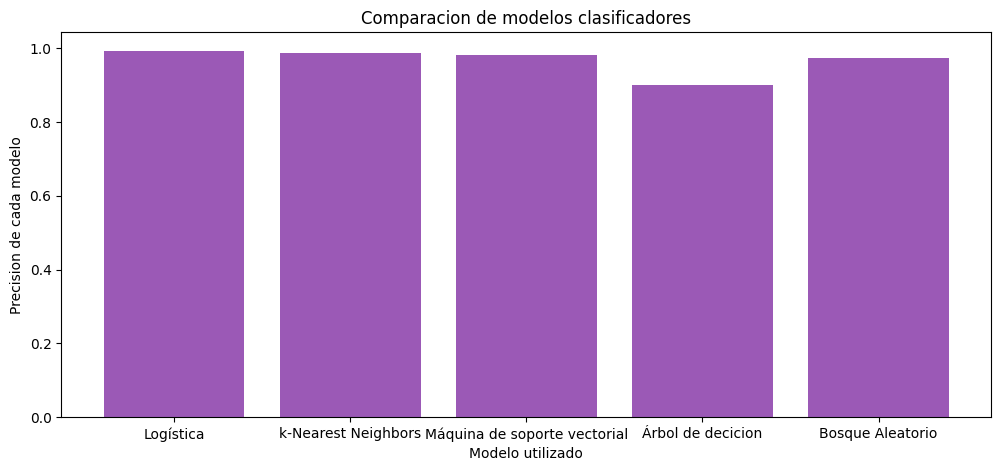


El modelo más preciso es: Logística con una precisión de 0.99


In [176]:
''' Definimos la funcion principal'''

def funcion_base():
    # Cargar datos desde el archivo CSV
    Rt_ach = '/content/cancer - cancer (1).csv' #Se coloca la ruta del archivo para ser leida
    conj_dat = pd.read_csv(Rt_ach) #definimos la variable "conj_dat" para que almecene el conjunto de datos extraidos del archivo CSV

    '''Convierte la columna 'diagnosis' del DataFrame conj_dat de valores de texto ('M' y 'B') a valores numéricos (1 y 0). En este contexto, 'M' podría representar un diagnóstico maligno (1) y 'B' un diagnóstico benigno (0)'''

    #Se crea una lista vacía llamada etiquetas_numericas, que se usará para almacenar los valores numéricos convertidos.
    etiquetas_numericas = []

    '''Este bucle recorre cada valor en la columna "diagnosis" que contiene los valores del doagnosticp'''
    for valor in conj_dat['diagnosis']:
        if valor == 'M':
            etiquetas_numericas.append(1)
        else:
            etiquetas_numericas.append(0)
            '''La lista etiquetas_numericas se asigna nuevamente a la columna 'diagnosis reemplazando los valores originales con valores numericos'''
    conj_dat['diagnosis'] = etiquetas_numericas

    # Separamos las características (Alpha) y las etiquetas (Beta)

    Alpha = conj_dat.drop(['id', 'diagnosis'], axis=1) #Se asigna a todas las columnas de conj_dat sin la columna 'id'
    Beta = conj_dat['diagnosis'] # Se asigna la columna 'diagnosis' a la variable Beta

    # Dividir los datos en entrenamiento y prueba
    Alpha_entrenamiento, Alpha_prueba, Beta_entrenamiento, Beta_prueba = train_test_split(Alpha, Beta, test_size= 0.30 , random_state=42) # Se dividen en dos partes: el conjunto de entrenamiento y el conjunto de prueba, el 30% de los datos se usan para prueba  y el 70% paraentrenamiento

    '''Normaliza las caracteristicas'''
    escalador = StandardScaler() #Normaliza las características
    Alpha_entrenamiento = escalador.fit_transform(Alpha_entrenamiento) # Calcular la media y la desviación estándar de las características en los datos de entrenamiento.
    Alpha_prueba = escalador.transform(Alpha_prueba)

    ''' Crear una instancia de la clase Modelos_Clasificadores'''
    modelos = Modelos_Clasificadores()
    #Se ajustan los modelos
    print("\nEntrenando modelos espere un poco...") #xd
    modelos.ajustar_modelos(Alpha_entrenamiento, Beta_entrenamiento)

    #Se evaluar los modelos
    print("\nEvaluando modelos...")
    #La clase Modelos_Clasificadores que evalúa el rendimiento de los modelos entrenados
    modelos.evaluar_modelos(Alpha_prueba, Beta_prueba)

    '''Este ciclo for recorre todos los modelos en modelos.resultados_modelos, extrae la precisión de cada modelo (resultados['accuracy']), y la guarda en el diccionario precisiones_modelos con el nombre del modelo como clave'''
    precisiones_modelos = {}
    for nombre, resultados in modelos.resultados_modelos.items():
        precisiones_modelos[nombre] = resultados['accuracy']

    '''Recorre el diccionario precisiones_modelos, que contiene las precisiones de los modelos de clasificación, y las imprime de manera formateada'''
    print("\nComparación de precisión de los modelos:")
    for nombre, precision in precisiones_modelos.items():
        print(nombre + ": " + str(round(precision, 9))) #edondeando las precisiones a 9 decimales para una presentación más precisa

    '''Se devuelve el diccionario "precisiones_modelos", que contiene las precisiones de todos los modelos entrenados y evaluados.'''
    return precisiones_modelos


'''Esta funcion grafica los resultados obtenidos y con los que hemos estado trabajando'''
def generar_tabla_resultados(precisiones_modelos):
    # Crear un gráfico de color morado
    plt.figure(figsize=(12, 5))
    plt.bar(precisiones_modelos.keys(), precisiones_modelos.values(), color= '#9b59b6')  # Color morado
    plt.title("Comparacion de modelos clasificadores")
    plt.ylabel("Precision de cada modelo")
    plt.xlabel("Modelo utilizado")
    plt.xticks(rotation=0)
    plt.show()

    # Esto nos permite identificar el mejor clasificador de todos
    mejor_modelo = max(precisiones_modelos, key=precisiones_modelos.get)
    print("\nEl modelo más preciso es: " + mejor_modelo + " con una precisión de " + str(round(precisiones_modelos[mejor_modelo], 2)))


# Ejecutar la función principal si el archivo es ejecutado directamente
if __name__ == "__main__":
    resultados_precisiones = funcion_base()  # Llamar a la función principal
    generar_tabla_resultados(resultados_precisiones)  # Mostrar gráfico con los resultados
